# Audio Files and their properties
### Load Audio

In [1]:
import librosa
import numpy as np

audio_files = []

# calm - 2
audio_files.append("data/raw/RAVDESS/Actor_01/03-01-02-01-01-01-01.wav")
audio_files.append("data/raw/RAVDESS/Actor_01/03-01-02-02-01-01-01.wav")

# happy - 2
audio_files.append("data/raw/RAVDESS/Actor_01/03-01-03-01-01-01-01.wav")
audio_files.append("data/raw/RAVDESS/Actor_01/03-01-03-02-01-01-01.wav")

# female happy - 1
audio_files.append("data/raw/RAVDESS/Actor_02/03-01-03-01-01-01-02.wav")
audio_files.append("data/raw/RAVDESS/Actor_02/03-01-03-02-01-01-02.wav")

print(f"Loaded {len(audio_files)} audio files\n")

# Process each audio file
for idx, file_path in enumerate(audio_files, 1):
    # librosa converts audio into a numpy array
    # sr=22050 resamples the audio to 22,050 Hz to ensure consistency
    y, sr = librosa.load(file_path, sr=22050)

    rms_energy = np.mean(librosa.feature.rms(y=y))

    emotion_map = {
    "01": "neutral", "02": "calm", "03": "happy", "04": "sad",
    "05": "angry", "06": "fearful", "07": "disgust", "08": "surprised"
    }

    emotion_code = file_path.split("/")[-1].split("-")[2]
    emotion = emotion_map.get(emotion_code, "unknown")

    
    print(f"Path: {file_path}")
    print(f"File {idx} | Emotion: {emotion}")
    print(f"Duration: {len(y)/sr:.2f}s")
    print(f"Sampling rate: {sr} Hz")
    # Checks for normalization/too quiet audio
    print(f"Max amplitude: {np.max(np.abs(y)):.4f}")
    print(f"RMS Energy: {rms_energy:.6f}")
    
    print("-" * 50)


Loaded 6 audio files

Path: data/raw/RAVDESS/Actor_01/03-01-02-01-01-01-01.wav
File 1 | Emotion: calm
Duration: 3.54s
Sampling rate: 22050 Hz
Max amplitude: 0.0260
RMS Energy: 0.001653
--------------------------------------------------
Path: data/raw/RAVDESS/Actor_01/03-01-02-02-01-01-01.wav
File 2 | Emotion: calm
Duration: 3.70s
Sampling rate: 22050 Hz
Max amplitude: 0.0224
RMS Energy: 0.001501
--------------------------------------------------
Path: data/raw/RAVDESS/Actor_01/03-01-03-01-01-01-01.wav
File 3 | Emotion: happy
Duration: 3.47s
Sampling rate: 22050 Hz
Max amplitude: 0.0585
RMS Energy: 0.004263
--------------------------------------------------
Path: data/raw/RAVDESS/Actor_01/03-01-03-02-01-01-01.wav
File 4 | Emotion: happy
Duration: 3.67s
Sampling rate: 22050 Hz
Max amplitude: 0.1263
RMS Energy: 0.006439
--------------------------------------------------
Path: data/raw/RAVDESS/Actor_02/03-01-03-01-01-01-02.wav
File 5 | Emotion: happy
Duration: 3.60s
Sampling rate: 22050 Hz

# MFCC
This is used for speech recognition. MFCC's are mathematical rep of voice tract produced by humans as we speak.
1. Signal Processing: Breaking down the audio signal into simple parts(based on frequencies) This is done by Fourier transformation 
2. Frequency Transformation: Using mel-scale to get close to the human perception of sound. More sensitive to changes at low frequencies than the higher ones. For freq below 1000hz liner scaling is done, for the ones above it logarithmic scale is used to achieve this.
3. Cepstral-rep : The mel-scale transformed signal is then seperated into 2 parts "Pitch - The periodic variation" and "Timbre - the slow vibration". Later has the main info that can be used for Speech Recognition.

## Pre-Emphasis 
This is the artificial enhancement of Higher frequencies, This is to cover up the low intensity of human voice for higher freq and also to improve speech qulaity, increase SNR making speech more stand out wrt the background.

### Order: Pre-Emphasis, Framing, Windowing, FFT, Mel-filter.

Calm
MFCC shape: (13, 153)
Delta shape: (13, 153)
Delta-Delta shape: (13, 153)
----------------------------------------
Happy
MFCC shape: (13, 150)
Delta shape: (13, 150)
Delta-Delta shape: (13, 150)
----------------------------------------
Sad
MFCC shape: (13, 166)
Delta shape: (13, 166)
Delta-Delta shape: (13, 166)
----------------------------------------


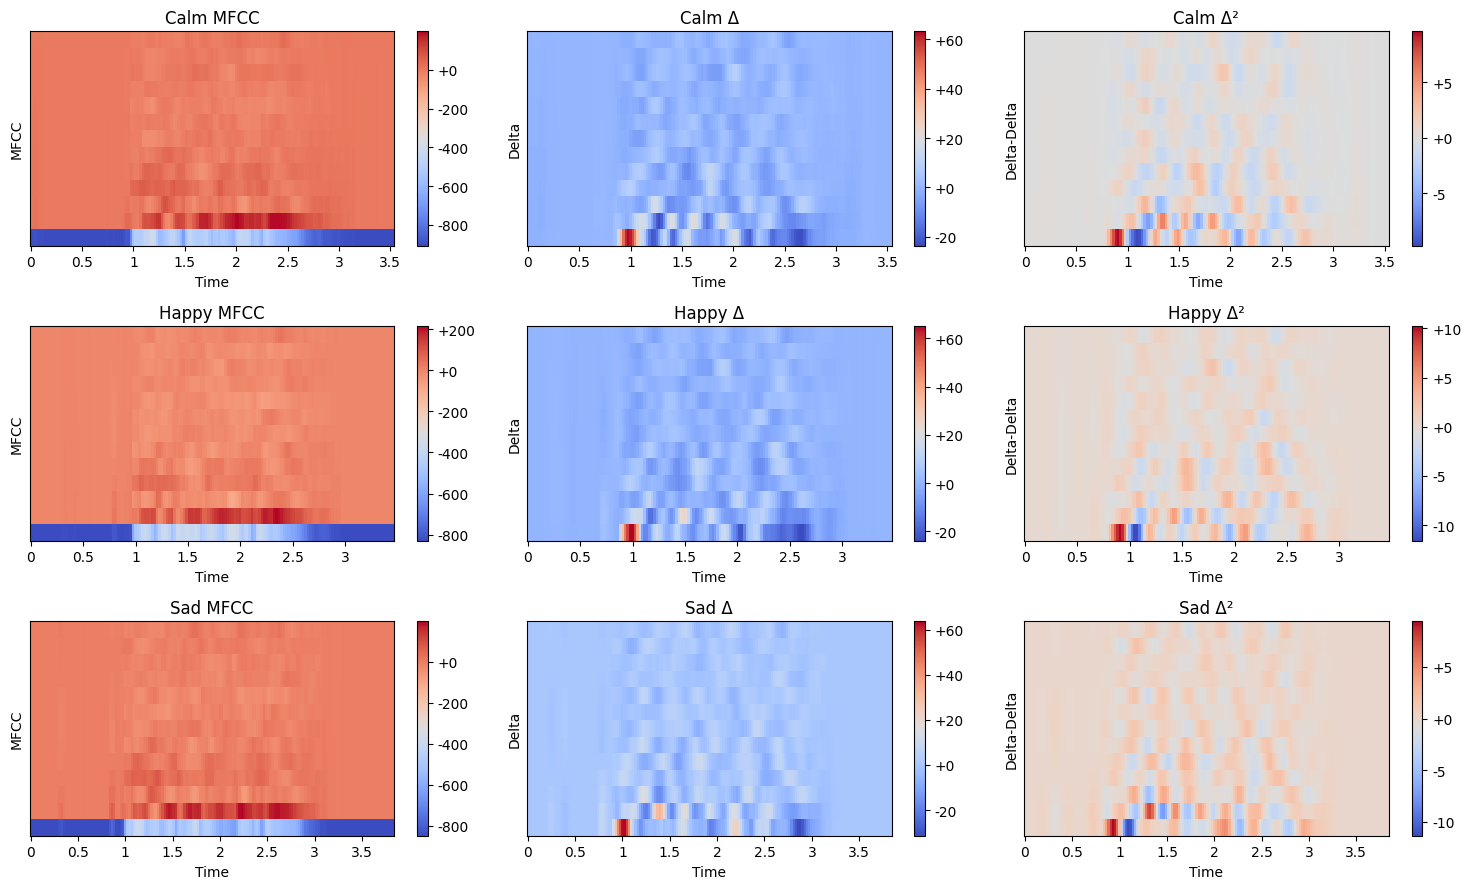

In [5]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

emotion_files = {
    "Calm": "data/raw/RAVDESS/Actor_01/03-01-02-01-01-01-01.wav",
    "Happy": "data/raw/RAVDESS/Actor_01/03-01-03-01-01-01-01.wav",
    "Sad": "data/raw/RAVDESS/Actor_01/03-01-04-01-01-01-01.wav"
}

plt.figure(figsize=(15, 9))

plot_idx = 1

for emotion, file_path in emotion_files.items():
    y, sr = librosa.load(file_path, sr=22050)

    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    delta = librosa.feature.delta(mfcc)
    delta_delta = librosa.feature.delta(delta)

    # Print shapes
    print(f"{emotion}")
    print(f"MFCC shape: {mfcc.shape}")
    print(f"Delta shape: {delta.shape}")
    print(f"Delta-Delta shape: {delta_delta.shape}")
    print("-" * 40)

    # MFCC
    plt.subplot(3, 3, plot_idx)
    librosa.display.specshow(mfcc, sr=sr, x_axis="time")
    plt.title(f"{emotion} MFCC")
    plt.ylabel("MFCC")
    plt.colorbar(format="%+2.0f")
    plot_idx += 1

    # Delta
    plt.subplot(3, 3, plot_idx)
    librosa.display.specshow(delta, sr=sr, x_axis="time")
    plt.title(f"{emotion} Δ")
    plt.ylabel("Delta")
    plt.colorbar(format="%+2.0f")
    plot_idx += 1

    # Delta-Delta
    plt.subplot(3, 3, plot_idx)
    librosa.display.specshow(delta_delta, sr=sr, x_axis="time")
    plt.title(f"{emotion} Δ²")
    plt.ylabel("Delta-Delta")
    plt.colorbar(format="%+2.0f")
    plot_idx += 1

plt.tight_layout()
plt.show()


# Spectogram 
### for A1,A2,A3 on emotions happy vs sad

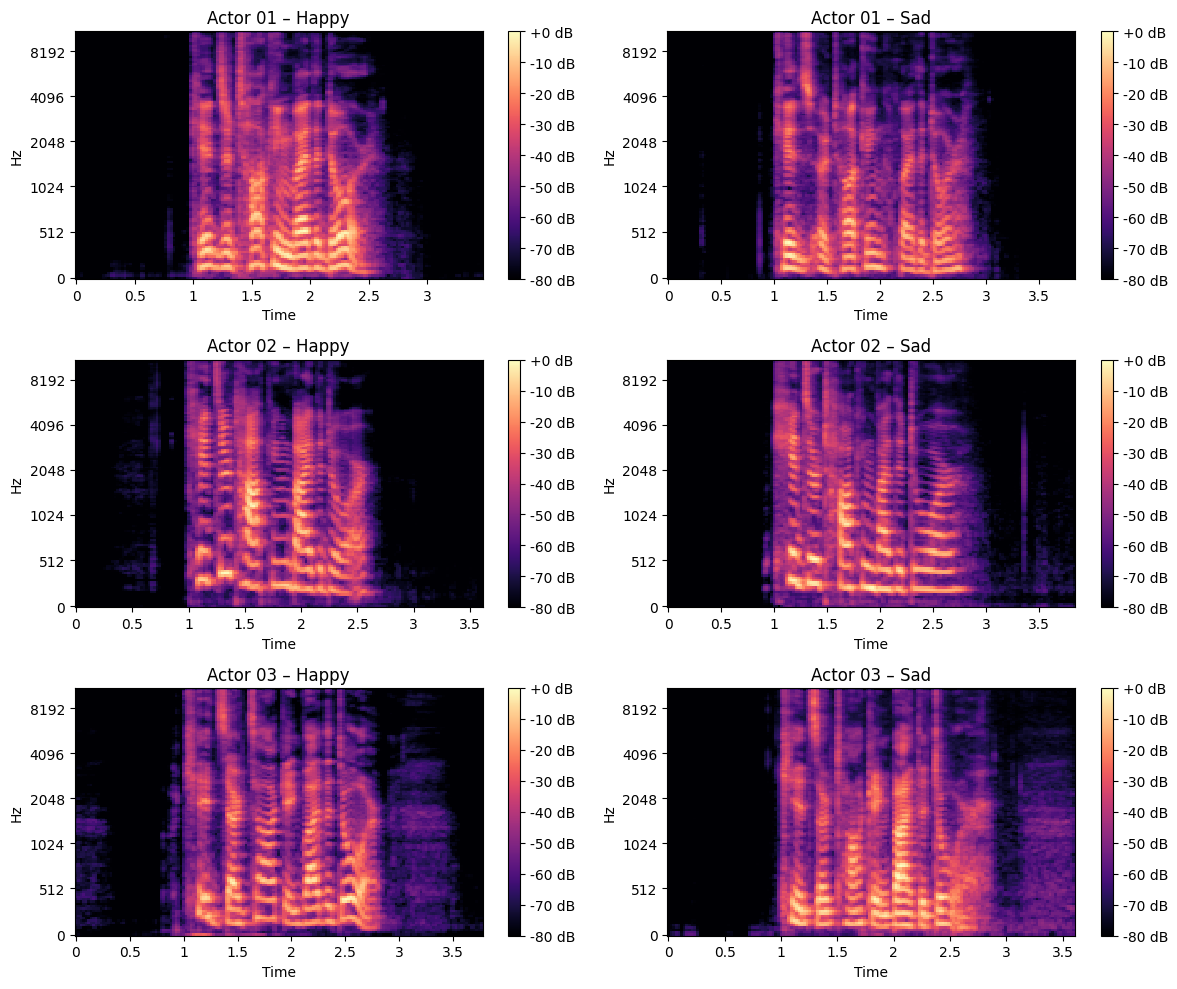

Actor      Emotion    RMS   Centroid  Bandwidth    ZCR  HF/LF Ratio
Actor 01   Happy  0.0585 0.0043    3067.91    2581.13 0.4011       0.0050
Actor 01   Sad    0.0458 0.0022    3160.40    2559.56 0.2988       0.0074
Actor 02   Happy  0.1734 0.0068    3137.29    2486.85 0.3732       0.0396
Actor 02   Sad    0.0426 0.0028    2116.06    1875.64 0.2228       0.0123
Actor 03   Happy  0.0994 0.0079    2752.87    2473.32 0.2362       0.0113
Actor 03   Sad    0.0553 0.0024    2966.32    2513.47 0.2199       0.0092


In [8]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Happy vs Sad samples from 3 different actors
audio_pairs = {
    "Actor 01": {
        "Happy": "data/raw/RAVDESS/Actor_01/03-01-03-01-01-01-01.wav",
        "Sad":   "data/raw/RAVDESS/Actor_01/03-01-04-01-01-01-01.wav"
    },
    "Actor 02": {
        "Happy": "data/raw/RAVDESS/Actor_02/03-01-03-01-01-01-02.wav",
        "Sad":   "data/raw/RAVDESS/Actor_02/03-01-04-01-01-01-02.wav"
    },
    "Actor 03": {
        "Happy": "data/raw/RAVDESS/Actor_03/03-01-03-01-01-01-03.wav",
        "Sad":   "data/raw/RAVDESS/Actor_03/03-01-04-01-01-01-03.wav"
    }
}

plt.figure(figsize=(12, 10))
plot_idx = 1

for actor, emotions in audio_pairs.items():
    for emotion, file_path in emotions.items():
        
        # Load audio
        y, sr = librosa.load(file_path, sr=22050)
        
        S = librosa.feature.melspectrogram(y=y, sr=sr)
        S_db = librosa.power_to_db(S, ref=np.max)

        # X-axis: Time (seconds)
        # Y-axis: Frequency (Mel scale)
        # Color: Loudness (dB)
        plt.subplot(3, 2, plot_idx)
        librosa.display.specshow(S_db,sr=sr,x_axis="time",y_axis="mel")
        plt.colorbar(format="%+2.0f dB")
        plt.title(f"{actor} – {emotion}")
        plot_idx += 1

plt.tight_layout()
plt.show()

def compute_features(y, sr):
    rms = np.mean(librosa.feature.rms(y=y))
    centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
    zcr = np.mean(librosa.feature.zero_crossing_rate(y))
    
    S = librosa.feature.melspectrogram(y=y, sr=sr)
    high_freq_energy = np.mean(S[60:, :])
    low_freq_energy = np.mean(S[:20, :])
    high_low_ratio = high_freq_energy / (low_freq_energy + 1e-6)
    max_amplitude = np.max(np.abs(y))
    
    return max_amplitude, rms, centroid, bandwidth, zcr, high_low_ratio

# Prepare table header for comparison
print(f"{'Actor':<10} {'Emotion':<6} {'RMS':>6} {'Centroid':>10} {'Bandwidth':>10} {'ZCR':>6} {'HF/LF Ratio':>12}")

for actor, emotions in audio_pairs.items():
    for emotion, file_path in emotions.items():
        y, sr = librosa.load(file_path, sr=22050)
        max_amplitude, rms, centroid, bandwidth, zcr, hf_lf = compute_features(y, sr)

        print(f"{actor:<10} {emotion:<6} {max_amplitude:6.4f} {rms:6.4f} {centroid:10.2f} {bandwidth:10.2f} {zcr:6.4f} {hf_lf:12.4f}")

